**K-Means Clustering for Customer Segmentation**

Segment customers based on annual income and spending score using the K-Means
 clustering algorithm.

**Step 1: Install Required Libraries**

In [34]:
 !pip install pandas matplotlib seaborn scikit-learn

**Load the Dataset**

 We’ll use a sample Mall Customers dataset (if you don’t have it, I can help you create it or
 you can download from
Kaggle).

In [35]:
import kagglehub
imakash3011_customer_personality_analysis_path = kagglehub.dataset_download('imakash3011/customer-personality-analysis')

print('Data source import complete.')


Data source import complete.


In [36]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/customer-personality-analysis/marketing_campaign.csv


In [37]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
# For data manipulation
# For plotting
# For visualization
# KMeans clustering algorithm
from sklearn.preprocessing import StandardScaler  # For feature scaling
# Load the dataset
df = pd.read_csv("../kaggle/input/customer-personality-analysis/marketing_campaign.csv", sep="\t")  # Replace with your path
# Display the first few rows
print(df.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

**Step 3: Explore and Clean the Data**

In [38]:
# Check column names
print(df.columns)

# Drop ID as it’s just an identifier (replaces CustomerID)
df = df.drop('ID', axis=1)

# Display basic info about the cleaned dataset
print(df.info())


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome          

**Step 4: Select Features for Clustering**

In [39]:
# Remove rows with any NaNs in selected columns
X_cleaned = df[['Income', 'MntWines', ]].dropna()

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cleaned)

**Step 5: Determine Optimal Number of Clusters (Elbow Method)**

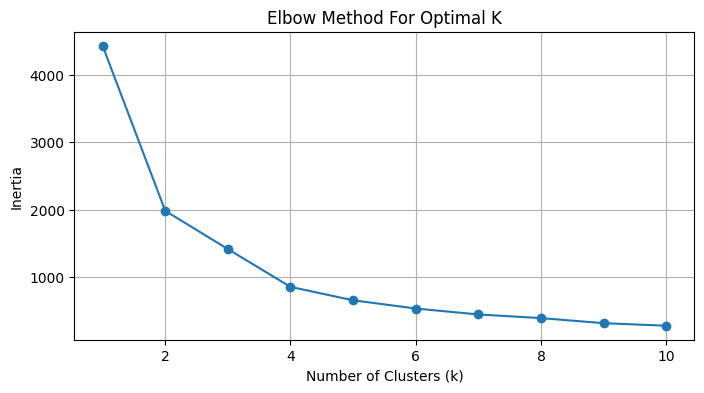

In [40]:
# Initialize an empty list to store the inertia (within-cluster sum of squares) for each value of k
inertia = []

# Try different values of k (number of clusters) from 1 to 10
for k in range(1, 11):
    # Create a KMeans model with the current number of clusters
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Fit the KMeans model to the scaled data
    kmeans.fit(X_scaled)

    # Store the computed inertia (how tightly the data points are clustered around the centroids)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve to visualize the optimal number of clusters
plt.figure(figsize=(8, 4))  # Set the size of the plot

# Plot the inertia values for each k with dots on the line
plt.plot(range(1, 11), inertia, marker='o')

# Add plot title and labels
plt.title('Elbow Method For Optimal K')         # Title of the plot
plt.xlabel('Number of Clusters (k)')            # X-axis label
plt.ylabel('Inertia')                           # Y-axis label

# Add a grid for better readability
plt.grid(True)

# Show the plot
plt.show()


**Step 6: Apply K-Means Clustering**

In [41]:
# Fit KMeans to cleaned data
kmeans = KMeans(n_clusters=5, random_state=42)
X_cleaned['Cluster'] = kmeans.fit_predict(X_scaled)

# View results
print(X_cleaned.head())

    Income  MntWines  Cluster
0  58138.0       635        1
1  46344.0        11        2
2  71613.0       426        1
3  26646.0        11        0
4  58293.0       173        2


**Step 7: Visualize the Clusters**

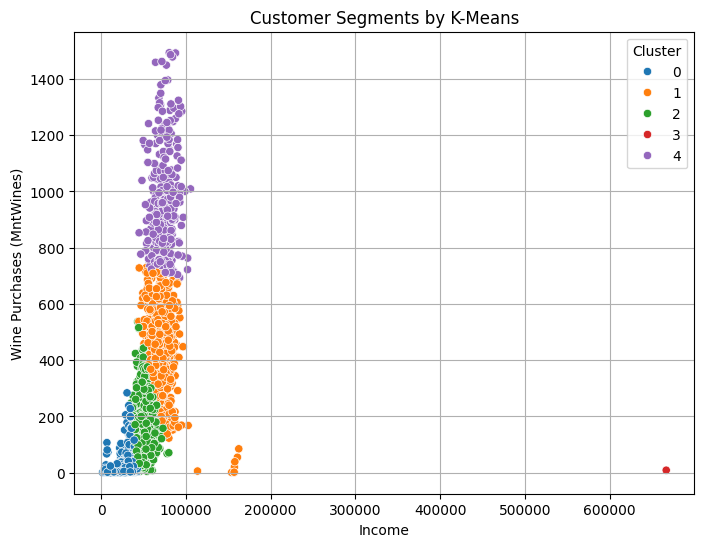

In [44]:
plt.figure(figsize=(8, 6))

# Use X_cleaned (which includes the 'Cluster' column)
sns.scatterplot(
    x=X_cleaned['Income'],
    y=X_cleaned['MntWines'],
    hue=X_cleaned['Cluster'],
    palette='tab10'
)

plt.title('Customer Segments by K-Means')
plt.xlabel('Income')
plt.ylabel('Wine Purchases (MntWines)')
plt.legend(title='Cluster')
plt.grid(True)

plt.show()
#X-axis → Customer Income
#Y-axis → Wine spending
#Color (hue) → Cluster ID (1 to 5), each shown in a different color

**Summary**

🎯 Objective:
The goal of this project is to segment customers (i.e., group them into distinct clusters) based on their income and how much they spend on wine (MntWines).
This helps businesses understand different types of customers so they can offer personalized marketing, promotions, or product recommendations.


📊 **How It Works:**

1.    **Load and clean the data:**
* You selected only two important features:
*  Income: how much money a customer earns
*  MntWines: how much they spend on wine
2. **Preprocess the data:**
*  You removed missing values
*  Scaled the data to give both features equal importance using StandardScaler
3.  **Apply K-Means Clustering:**
*  You tested different numbers of clusters (k = 1 to 10)
*  You used the Elbow Method to choose the best number of clusters (in this case, k = 5)
4. **Assign clusters:**
*  Each customer was assigned to one of 5 clusters